In [2]:
import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk import Text
from nltk import FreqDist

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
# 영국 BBC NEWS의 War in Ukraine 카테고리 중 한 뉴스
# 기사 제목: Ukraine bid to join EU will take decades says Macron

In [7]:
with open("BBC NEWS.txt") as f:
    bbc = f.read()

In [8]:
print(bbc)

Ukraine bid to join EU will take decades says Macron

Mr Macron (L) later joined German leader Olaf Scholz in Berlin
It will take decades for Ukraine to be accepted into the European Union, France's Emmanuel Macron has said.

In a speech to the EU's parliament in Strasbourg, he instead suggested Ukraine could join a "parallel European community" while it awaited a decision.

This would allow non-EU members to join Europe's security architecture in other ways, said President Macron.

His words came as fierce fighting continued in the eastern Donbas region, where Russia is trying to make gains.

A senior US defence official characterised the Russian advance as "single-digit kilometre kind of progress". A Ukrainian leader in the Luhansk region said serious battles were taking place.

In other developments on Monday:

President Vladimir Putin marked Russia's Victory Day by insisting that Russian forces in Ukraine were fighting for their motherland. But he made no major announcements in his

In [13]:
retokenize=RegexpTokenizer('[\w]+')
retokenize.tokenize(bbc)
#의미 있는 단어 찾기

['Ukraine',
 'bid',
 'to',
 'join',
 'EU',
 'will',
 'take',
 'decades',
 'says',
 'Macron',
 'Mr',
 'Macron',
 'L',
 'later',
 'joined',
 'German',
 'leader',
 'Olaf',
 'Scholz',
 'in',
 'Berlin',
 'It',
 'will',
 'take',
 'decades',
 'for',
 'Ukraine',
 'to',
 'be',
 'accepted',
 'into',
 'the',
 'European',
 'Union',
 'France',
 's',
 'Emmanuel',
 'Macron',
 'has',
 'said',
 'In',
 'a',
 'speech',
 'to',
 'the',
 'EU',
 's',
 'parliament',
 'in',
 'Strasbourg',
 'he',
 'instead',
 'suggested',
 'Ukraine',
 'could',
 'join',
 'a',
 'parallel',
 'European',
 'community',
 'while',
 'it',
 'awaited',
 'a',
 'decision',
 'This',
 'would',
 'allow',
 'non',
 'EU',
 'members',
 'to',
 'join',
 'Europe',
 's',
 'security',
 'architecture',
 'in',
 'other',
 'ways',
 'said',
 'President',
 'Macron',
 'His',
 'words',
 'came',
 'as',
 'fierce',
 'fighting',
 'continued',
 'in',
 'the',
 'eastern',
 'Donbas',
 'region',
 'where',
 'Russia',
 'is',
 'trying',
 'to',
 'make',
 'gains',
 'A',
 '

In [18]:
bbc_tokens=pos_tag(retokenize.tokenize(bbc))

In [19]:
bbc_tokens

[('Ukraine', 'NNP'),
 ('bid', 'NN'),
 ('to', 'TO'),
 ('join', 'VB'),
 ('EU', 'NNP'),
 ('will', 'MD'),
 ('take', 'VB'),
 ('decades', 'NNS'),
 ('says', 'VBZ'),
 ('Macron', 'NNP'),
 ('Mr', 'NNP'),
 ('Macron', 'NNP'),
 ('L', 'NNP'),
 ('later', 'RB'),
 ('joined', 'VBD'),
 ('German', 'JJ'),
 ('leader', 'NN'),
 ('Olaf', 'NNP'),
 ('Scholz', 'NNP'),
 ('in', 'IN'),
 ('Berlin', 'NNP'),
 ('It', 'PRP'),
 ('will', 'MD'),
 ('take', 'VB'),
 ('decades', 'NNS'),
 ('for', 'IN'),
 ('Ukraine', 'NNP'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('accepted', 'VBN'),
 ('into', 'IN'),
 ('the', 'DT'),
 ('European', 'NNP'),
 ('Union', 'NNP'),
 ('France', 'NNP'),
 ('s', 'VBD'),
 ('Emmanuel', 'NNP'),
 ('Macron', 'NNP'),
 ('has', 'VBZ'),
 ('said', 'VBD'),
 ('In', 'IN'),
 ('a', 'DT'),
 ('speech', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('EU', 'NNP'),
 ('s', 'NN'),
 ('parliament', 'NN'),
 ('in', 'IN'),
 ('Strasbourg', 'NNP'),
 ('he', 'PRP'),
 ('instead', 'RB'),
 ('suggested', 'VBD'),
 ('Ukraine', 'NNP'),
 ('could', 'MD'),
 ('join

In [32]:
fd_names=FreqDist(bbc_tokens)

In [33]:
fd_names.most_common(15) # 자주 등장하는 단어의 순위

[(('the', 'DT'), 28),
 (('to', 'TO'), 22),
 (('in', 'IN'), 16),
 (('Ukraine', 'NNP'), 15),
 (('a', 'DT'), 14),
 (('of', 'IN'), 13),
 (('EU', 'NNP'), 12),
 (('said', 'VBD'), 12),
 (('on', 'IN'), 10),
 (('for', 'IN'), 9),
 (('Mr', 'NNP'), 7),
 (('Macron', 'NNP'), 6),
 (('be', 'VB'), 6),
 (('s', 'NN'), 6),
 (('Russia', 'NNP'), 6)]

In [34]:
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear", "to", "the", "and", "of", "I", "It", "in", "not", "a", "for", "be"]

In [35]:
bbc_tokens2=[w[0] for w in bbc_tokens if w[1]=='NNP' and w[0] not in stopwords]

In [36]:
fd_names2=FreqDist(bbc_tokens2)

In [38]:
fd_names2.most_common(10)

[('Ukraine', 15),
 ('EU', 12),
 ('Macron', 6),
 ('Russia', 6),
 ('Monday', 6),
 ('Europe', 5),
 ('President', 5),
 ('Putin', 4),
 ('Scholz', 3),
 ('Berlin', 3)]

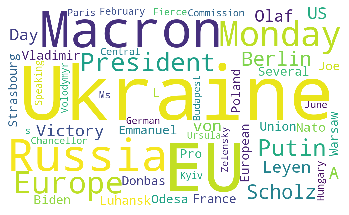

In [39]:
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names2))
plt.axis("off") # 축 제거
plt.show()